# WCWH Rollout Preparation
Working to get the beacons ready for their next adventure. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Calibration Inspection
Looking at the results from the calibration experiments

In [3]:
import os
import sys
sys.path.append('../')

import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from src.visualization import visualize

from src.calibration import calibrate

import math
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Comparison

In [53]:
class comparison:
    
    def __init__(self,param,env1,env2):
        self.param = param
        self.env1 = env1
        self.env2 = env2
        
        self.data = self.import_and_combine(self.param,self.env1,self.env2)
        self.set_diffs()
        
    def import_and_combine(self,param,env1,env2):
        """
        Imports and combines data for the given sensor
        """
        df1 = pd.read_csv(f"../data/interim/{param}-linear_model_{env1}-wcwh_s21.csv",index_col=0)
        df2 = pd.read_csv(f"../data/interim/{param}-linear_model_{env2}-wcwh_s21.csv",index_col=0)
        
        return df1.merge(df2,left_index=True,right_index=True,suffixes=[f"_{env1}",f"_{env2}"])
    
    def set_diffs(self):
        """
        Gets the raw and percent differences between environemnts
        """
        for x in ["constant","coefficient"]:
            self.data[f"{x}_diff"] = self.data[f"{x}_{self.env1}"] - self.data[f"{x}_{self.env2}"]
            self.data[f"{x}_per_diff"] = self.data[f"{x}_diff"] / self.data[f"{x}_{self.env1}"] * 100
            
    def plot_diffs(self,save=False):
        """
        Plots the percent differences
        """
        df = self.data.copy()
        df.index = df.index.map(str)

        _, ax = plt.subplots(figsize=(16,4))
        ax.scatter(df.index,df["constant_per_diff"],s=50,color="black",zorder=10,label="$x_0$")
        ax.scatter(df.index,df["coefficient_per_diff"],s=60,color="firebrick",marker="s",zorder=1,label="$x_1$")
        ax.axhline(0,lw=2,ls="dashed",color="black")
        # x-axis
        ax.set_xlabel("Device Number",fontsize=16)
        # y-axis
        ax.set_ylabel("Percent Change",fontsize=16)
        # other
        ax.tick_params(labelsize=14)
        for loc in ["top","right"]:
            ax.spines[loc].set_visible(False)
        ax.legend(frameon=False,fontsize=14)

        if save:
            plt.savefig(f"../reports/figures/calibration-parameter_difference-{self.param}.pdf",bbox_inches="tight")
        plt.show()
        plt.close()

## Carbon Dioxide
Between testhouse and chamber

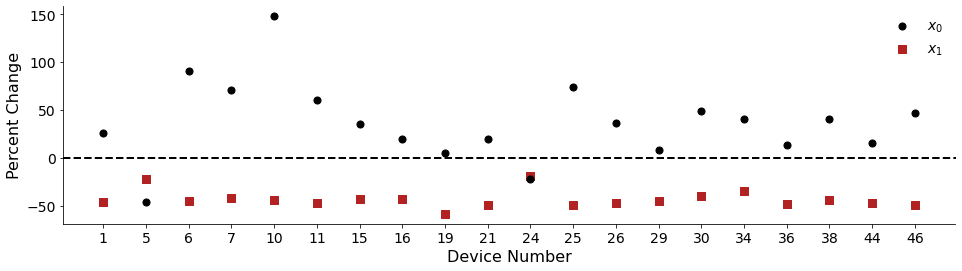

In [54]:
co2_comp = comparison("co2","testhouse","chamber")
co2_comp.plot_diffs(save=True)

In [39]:
co2_diff.sort_values("constant_per_diff")

,constant_house,coefficient_house,constant_chamber,coefficient_chamber,constant_diff,coefficient_diff,constant_per_diff,coefficient_per_diff
beacon,,,,,,,,
5,216.217814,1.143437,314.838208,1.398698,-98.620394,-0.255261,-45.611595,-22.323977
24,288.486891,1.166446,351.355691,1.389788,-62.868801,-0.223343,-21.792602,-19.147302
19,472.949089,0.900970,448.005221,1.427511,24.943868,-0.526542,5.274113,-58.441642
29,350.447763,0.915383,322.882788,1.327360,27.564975,-0.411978,7.865645,-45.006084
36,435.173158,0.945433,374.554427,1.398674,60.618731,-0.453241,13.929796,-47.940095
44,347.253031,0.888291,291.605916,1.307091,55.647116,-0.418800,16.024947,-47.146680
21,364.184233,0.904367,293.361470,1.353224,70.822763,-0.448858,19.446960,-49.632293
16,296.111990,0.839766,236.455544,1.197017,59.656447,-0.357252,20.146583,-42.541843
1,342.365073,0.821170,251.805181,1.196230,90.559892,-0.375060,26.451265,-45.673791


## Particulate Matter

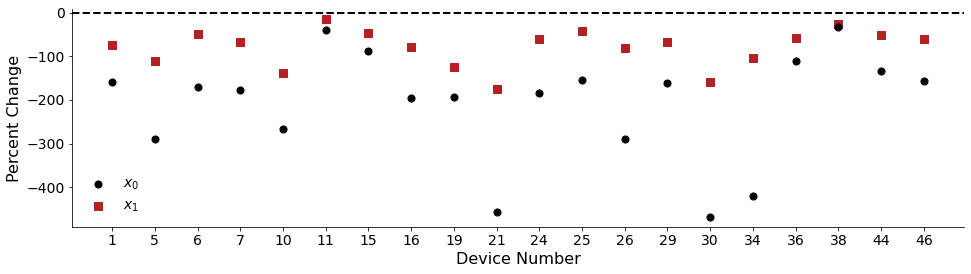

In [60]:
pm_comp = comparison("pm2p5_mass","testhouse","chamber")
pm_comp.plot_diffs(save=True)

In [64]:
pm_comp.data.sort_values("coefficient_testhouse")

,constant_testhouse,coefficient_testhouse,constant_chamber,coefficient_chamber,constant_diff,constant_per_diff,coefficient_diff,coefficient_per_diff
beacon,,,,,,,,
30,-3.091158,1.624765,-17.565979,4.199848,14.474820,-468.265244,-2.575083,-158.489573
21,-4.851254,1.765246,-27.037784,4.835381,22.186530,-457.335959,-3.070135,-173.921110
6,-7.395115,1.996449,-20.031402,2.961086,12.636287,-170.873441,-0.964637,-48.317653
11,-9.902424,2.102598,-13.872387,2.420540,3.969964,-40.090827,-0.317942,-15.121398
34,-4.185789,2.113211,-21.746033,4.305310,17.560245,-419.520571,-2.192099,-103.733090
26,-6.460552,2.311273,-25.178718,4.201816,18.718166,-289.730125,-1.890543,-81.796606
10,-8.384917,2.454119,-30.678068,5.875010,22.293151,-265.872045,-3.420891,-139.393866
36,-9.909055,2.744331,-20.824433,4.338043,10.915377,-110.155578,-1.593712,-58.072875
7,-9.080300,2.781336,-25.256606,4.664420,16.176306,-178.147265,-1.883084,-67.704280


## Carbon Monoxide